In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
def mapSmokerBool(column):
    smokerList=[]
    for i in column:
        if(i=='yes'):
            i= 1
            smokerList.append(i)
        else:
            i = 0
            smokerList.append(i)
    return smokerList

In [8]:
mappedSmoker =mapSmokerBool(df['smoker'])

In [11]:
df['smoker_norm'] =mappedSmoker;


In [13]:
df;obese

In [14]:
def mapBmi(col):
    obsList = []
    for i in col:
        if(i>30):
            obsList.append(1)
        else:
            obsList.append(0)
    return obsList
            
        

In [15]:
df['obese']= mapBmi(df['bmi'])

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_norm,obese
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0


In [20]:
def sex_map(col):
    sexList=[]
    for i in col:
        if(i=='male'):
            sexList.append(1)
        else:
            sexList.append(0)
    return sexList

In [21]:
df['sex_norm']=sex_map(df['sex'])

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_norm,obese,sex_norm
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,0,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
age            1338 non-null int64
sex            1338 non-null object
bmi            1338 non-null float64
children       1338 non-null int64
smoker         1338 non-null object
region         1338 non-null object
charges        1338 non-null float64
smoker_norm    1338 non-null int64
obese          1338 non-null int64
sex_norm       1338 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 104.6+ KB


In [24]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'smoker_norm', 'obese', 'sex_norm'],
      dtype='object')

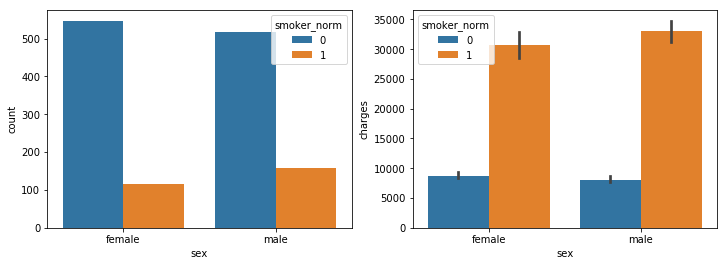

In [35]:
fig, axis = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
sns.countplot(x='sex',data=df,ax =axis[0],hue='smoker_norm')
sns.barplot(x='sex', y='charges', hue='smoker_norm', data=df,ax =axis[1])

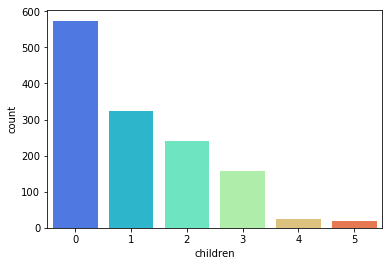

In [40]:
sns.countplot(x= 'children', data = df,palette='rainbow')

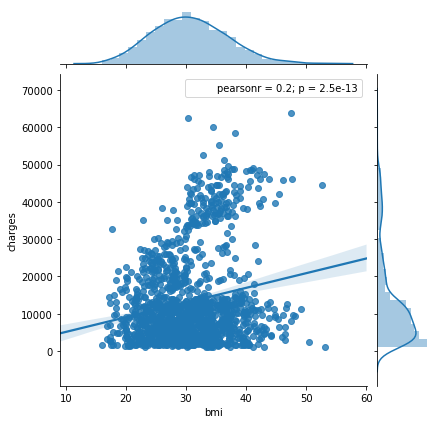

In [41]:
sns.jointplot(x='bmi', y='charges', data=df, kind='reg')

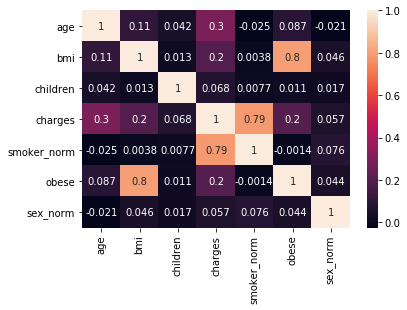

In [57]:
sns.heatmap(df.corr(),annot=True)

In [58]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'smoker_norm', 'obese', 'sex_norm'],
      dtype='object')

In [61]:
X =df [['age', 'bmi', 'children', 'smoker_norm', 'obese']]

In [63]:
X.head()


,age,bmi,children,smoker_norm,obese
0,19,27.900,0,1,0
1,18,33.770,1,0,1
2,28,33.000,3,0,1
3,33,22.705,0,0,0
4,32,28.880,0,0,0


In [64]:
y = df['charges']

In [66]:
y;

In [67]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [84]:
X_train.head()

,age,bmi,children,smoker_norm,obese
612,18,33.155,0,0,1
65,19,28.900,0,0,0
42,41,21.780,1,0,0
533,37,36.190,0,0,1
586,21,20.235,3,0,0


In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lr=LinearRegression()

In [74]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
lr.intercept_

-6569.1175230230929

In [76]:
lr.coef_

array([   241.39461251,     90.26053022,    537.54489467,  23418.33376791,
         4166.66138097])

In [77]:
X_train.columns

Index(['age', 'bmi', 'children', 'smoker_norm', 'obese'], dtype='object')

In [78]:
coefDf = pd.DataFrame(columns=['coefficient'], data = lr.coef_,index=X_train.columns)

In [79]:
coefDf

,coefficient
age,241.394613
bmi,90.260530
children,537.544895
smoker_norm,23418.333768
obese,4166.661381


In [80]:
y_pred = lr.predict(X_test)

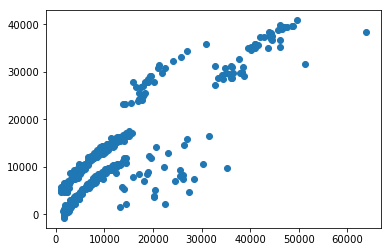

In [85]:
plt.scatter( y_test,y_pred)

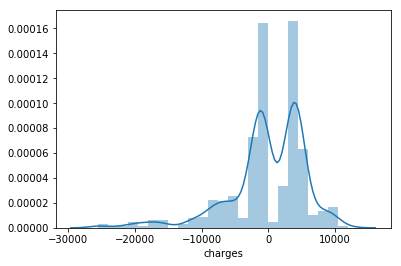

In [86]:
sns.distplot(y_pred - y_test)

In [88]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [90]:
print('MAE',metrics.mean_absolute_error(y_pred , y_test))
print('MSE',metrics.mean_squared_error(y_pred , y_test))
print('MSE',np.sqrt(metrics.mean_squared_error(y_pred , y_test)))

MAE 4244.48651806
MSE 33540220.0237
MSE 5791.39189001
